# Oppg 2, Fishing Experiment

In [1]:
import pandas as pd
import researchpy as rp
import statsmodels.graphics.factorplots as smgf
import statsmodels.api as sm
from statsmodels.formula.api import ols
fishing = pd.read_csv('FishingExperiment.csv', sep=';', decimal=',')
fishing.head()

,Yield,Hook,Lake,Time
0,14.0,Lure,Lake1,Morning
1,15.1,Lure,Lake1,Morning
2,12.4,Lure,Lake1,Morning
3,12.7,Lure,Lake1,Evening
4,17.2,Lure,Lake1,Evening


In [2]:
summary_fish = rp.summary_cont(fishing.groupby(['Hook', 'Lake', 'Time'])['Yield'])
summary_fish

N     Mean      SD      SE  95% Conf.  Interval
Hook   Lake  Time                                                    
Lure   Lake1 Evening  3  14.4333  2.4214  1.3980     8.4182   20.4485
             Morning  3  13.8333  1.3577  0.7839    10.4606   17.2060
       Lake2 Evening  3   9.3000  1.0583  0.6110     6.6710   11.9290
             Morning  3   7.1000  1.1790  0.6807     4.1712   10.0288
       Lake3 Evening  3  13.3000  0.7211  0.4163    11.5087   15.0913
             Morning  3  14.4333  0.2082  0.1202    13.9162   14.9504
       Lake4 Evening  3   7.8333  1.5308  0.8838     4.0306   11.6360
             Morning  3   9.4667  2.0599  1.1893     4.3495   14.5838
Wobler Lake1 Evening  3   8.8000  0.6245  0.3606     7.2487   10.3513
             Morning  3  11.2333  1.2503  0.7219     8.1273   14.3393
       Lake2 Evening  3   7.8333  0.7024  0.4055     6.0885    9.5781
             Morning  3   6.7333  0.0577  0.0333     6.5899    6.8768
       Lake3 Evening  3   7.3333  1.8877  1.0899     2.6441   12.0226
             Morning  3   7.6667  1.7673  1.0203     3.2765   12.0569
       Lake4 Evening  3   9.0333  2.7683  1.5983     2.1566   15.9101
             Morning  3  10.5333  1.8475  1.0667     5.9438   15.1228

## oppg 2a)

### Henter informasjon om de to modellene, første med 'time' og andre uten 'time'

In [9]:
model_3_way = ols('Yield ~ C(Hook, Sum)* C(Lake, Sum)* C(Time, Sum)', data=fishing).fit()
anova_table_3_way = sm.stats.anova_lm(model_3_way)
model_2_way_test = ols('Yield ~ C(Hook, Sum) * C(Lake, Sum)', data=fishing).fit()
anova_2_way_test = sm.stats.anova_lm(model_2_way_test)
anova_table_3_way

,df,sum_sq,mean_sq,F,PR(>F)
"C(Hook, Sum)",1.0,79.053333,79.053333,33.657619,1.929639e-06
"C(Lake, Sum)",3.0,125.594167,41.864722,17.824256,5.536719e-07
"C(Time, Sum)",1.0,1.840833,1.840833,0.783750,3.826009e-01
"C(Hook, Sum):C(Lake, Sum)",3.0,99.765000,33.255000,14.158595,4.808833e-06
"C(Hook, Sum):C(Time, Sum)",1.0,1.920000,1.920000,0.817456,3.726816e-01
"C(Lake, Sum):C(Time, Sum)",3.0,17.824167,5.941389,2.529596,7.472049e-02
"C(Hook, Sum):C(Lake, Sum):C(Time, Sum)",3.0,6.381667,2.127222,0.905683,4.491733e-01
Residual,32.0,75.160000,2.348750,NaN,NaN


In [10]:
anova_2_way_test

,df,sum_sq,mean_sq,F,PR(>F)
"C(Hook, Sum)",1.0,79.053333,79.053333,30.662616,2.109975e-06
"C(Lake, Sum)",3.0,125.594167,41.864722,16.238175,4.681421e-07
"C(Hook, Sum):C(Lake, Sum)",3.0,99.765000,33.255000,12.898701,4.889917e-06
Residual,40.0,103.126667,2.578167,NaN,NaN


In [15]:
import scipy.stats as stats
SS_ER = anova_2_way_test['sum_sq'][3]
SS_EF = anova_table_3_way['sum_sq'][7]
df_ER = anova_2_way_test['df'][3]
df_EF = anova_table_3_way['df'][7]
F0 = ((SS_ER-SS_EF)/(df_ER-df_EF))/(SS_EF/df_EF)
F_test = stats.f.sf(F0, df_ER-df_EF, df_EF)
F_test

0.200329889163724

### Vi kan ikke forkaste H0, fordi F_verdien er på 0.20, dermed så beholder vi den reduserte modellen (anova_2_way_test)

In [93]:
model_test = ols('Yield ~ C(Hook, Sum) * C(Time, Sum)', data=fishing).fit()
anova_table_test = sm.stats.anova_lm(model_test)
print(anova_table_test)

                             df      sum_sq    mean_sq          F    PR(>F)
C(Hook, Sum)                1.0   79.053333  79.053333  10.711669  0.002076
C(Time, Sum)                1.0    1.840833   1.840833   0.249432  0.619964
C(Hook, Sum):C(Time, Sum)   1.0    1.920000   1.920000   0.260159  0.612560
Residual                   44.0  324.725000   7.380114        NaN       NaN


In [95]:
model_test = ols('Yield ~ C(Lake, Sum) * C(Time, Sum)', data=fishing).fit()
anova_table_test = sm.stats.anova_lm(model_test)
print(anova_table_test)

                             df      sum_sq    mean_sq         F    PR(>F)
C(Lake, Sum)                3.0  125.594167  41.864722  6.384737  0.001224
C(Time, Sum)                1.0    1.840833   1.840833  0.280743  0.599143
C(Lake, Sum):C(Time, Sum)   3.0   17.824167   5.941389  0.906114  0.446670
Residual                   40.0  262.280000   6.557000       NaN       NaN


## Fra de to anova tablene over så kan man se at tidspunktet ikke er en avgjørende faktor og påvirker ikke Yield, dermed så fjerner man denne fra modelen og ser på de to andre faktorene.

## oppg 2b)

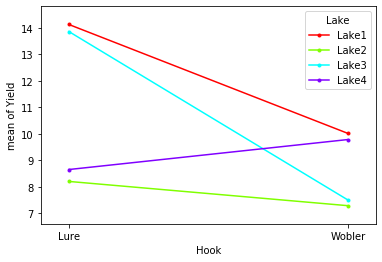

In [46]:
plot = smgf.interaction_plot(fishing['Hook'], fishing['Lake'], fishing['Yield'])

## oppg 2c)

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### H0: (tau * betta)_ij = 0, Ha: (tau * betta)_ij != 0

In [111]:
model = ols('Yield ~ C(Hook, Sum) * C(Lake, Sum)', data=fishing).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

                             df      sum_sq    mean_sq          F  \
C(Hook, Sum)                1.0   79.053333  79.053333  30.662616   
C(Lake, Sum)                3.0  125.594167  41.864722  16.238175   
C(Hook, Sum):C(Lake, Sum)   3.0   99.765000  33.255000  12.898701   
Residual                   40.0  103.126667   2.578167        NaN   

                                 PR(>F)  
C(Hook, Sum)               2.109975e-06  
C(Lake, Sum)               4.681421e-07  
C(Hook, Sum):C(Lake, Sum)  4.889917e-06  
Residual                            NaN  


### fra anova testen så kan du forkaste H0 og akseptere Ha

In [112]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     16.87
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           3.86e-10
Time:                        15:43:13   Log-Likelihood:                -86.463
No. Observations:                  48   AIC:                             188.9
Df Residuals:                      40   BIC:                             203.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      9.9292      0.232     42.843      0.000       9.461      10.398
C(Hook, Sum)[S.Lure]                           1.2833      0.232      5.537      0.000       0.815       1.752
C(Lake, Sum)[S.Lake1]                          2.1458      0.401      5.346      0.000       1.335       2.957
C(Lake, Sum)[S.Lake2]                         -2.1875      0.401     -5.449      0.000      -2.999      -1.376
C(Lake, Sum)[S.Lake3]                          0.7542      0.401      1.879      0.068      -0.057       1.565
C(Hook, Sum)[S.Lure]:C(Lake, Sum)[S.Lake1]     0.7750      0.401      1.931      0.061      -0.036       1.586
C(Hook, Sum)[S.Lure]:C(Lake, Sum)[S.Lake2]    -0.8250      0.401     -2.055      0.046      -1.636      -0.014
C(Hook, Sum)[S.Lure]:C(Lake, Sum)[S.Lake3]     1.9000      0.401      4.733      0.000       1.089       2.711
==============================================================================
Omnibus:                        0.193   Durbin-Watson:                   2.316
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.221
Skew:                           0.136   Prob(JB):                        0.895
Kurtosis:                       2.808   Cond. No.                         2.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## oppg 2d) 

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     16.87
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           3.86e-10
Time:                        15:43:30   Log-Likelihood:                -86.463
No. Observations:                  48   AIC:                             188.9
Df Residuals:                      40   BIC:                             203.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      9.9292      0.232     42.843      0.000       9.461      10.398
C(Hook, Sum)[S.Lure]                           1.2833      0.232      5.537      0.000       0.815       1.752
C(Lake, Sum)[S.Lake1]                          2.1458      0.401      5.346      0.000       1.335       2.957
C(Lake, Sum)[S.Lake2]                         -2.1875      0.401     -5.449      0.000      -2.999      -1.376
C(Lake, Sum)[S.Lake3]                          0.7542      0.401      1.879      0.068      -0.057       1.565
C(Hook, Sum)[S.Lure]:C(Lake, Sum)[S.Lake1]     0.7750      0.401      1.931      0.061      -0.036       1.586
C(Hook, Sum)[S.Lure]:C(Lake, Sum)[S.Lake2]    -0.8250      0.401     -2.055      0.046      -1.636      -0.014
C(Hook, Sum)[S.Lure]:C(Lake, Sum)[S.Lake3]     1.9000      0.401      4.733      0.000       1.089       2.711
==============================================================================
Omnibus:                        0.193   Durbin-Watson:                   2.316
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.221
Skew:                           0.136   Prob(JB):                        0.895
Kurtosis:                       2.808   Cond. No.                         2.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Som man ser fra tabellen så er estimatet til effekten på Lake3 = 0.7542 og estimatet til effekten på "interaction" mellom Lake2 og Wobler = 0.825

## oppg 2e) Tukeys test

In [89]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [90]:
fishing['combo'] = fishing.Lake + '/' + fishing.Hook

In [91]:
m_comp = pairwise_tukeyhsd(endog=fishing['Yield'], groups=fishing['combo'], alpha=.05)
print(m_comp)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  Lake1/Lure Lake1/Wobler  -4.1167 0.0016 -7.0799 -1.1534   True
  Lake1/Lure   Lake2/Lure  -5.9333  0.001 -8.8966 -2.9701   True
  Lake1/Lure Lake2/Wobler    -6.85  0.001 -9.8133 -3.8867   True
  Lake1/Lure   Lake3/Lure  -0.2667    0.9 -3.2299  2.6966  False
  Lake1/Lure Lake3/Wobler  -6.6333  0.001 -9.5966 -3.6701   True
  Lake1/Lure   Lake4/Lure  -5.4833  0.001 -8.4466 -2.5201   True
  Lake1/Lure Lake4/Wobler    -4.35  0.001 -7.3133 -1.3867   True
Lake1/Wobler   Lake2/Lure  -1.8167 0.5177 -4.7799  1.1466  False
Lake1/Wobler Lake2/Wobler  -2.7333 0.0892 -5.6966  0.2299  False
Lake1/Wobler   Lake3/Lure     3.85 0.0038  0.8867  6.8133   True
Lake1/Wobler Lake3/Wobler  -2.5167 0.1478 -5.4799  0.4466  False
Lake1/Wobler   Lake4/Lure  -1.3667 0.7928 -4.3299  1.5966  False
Lake1/Wobler Lake4/Wobler

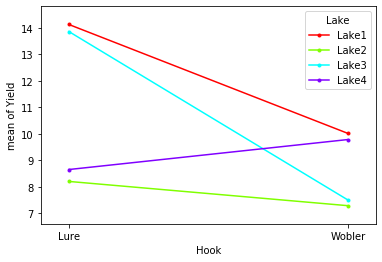

In [92]:
plot = smgf.interaction_plot(fishing['Hook'], fishing['Lake'], fishing['Yield'])